In [1]:
# Autor: Jairo Valea López
#
# Programa de ajuste de los datos de diámetro de partícula a distribución gamma en el
# marco del prototipo de disipación de niebla en la A-8 del GSJ.

# Importado de librerías necesarias

import os
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import time
import matplotlib
import natsort
from tqdm.notebook import tqdm, trange # barra de progreso
from matplotlib import pyplot as plt

def promedio(lst):
    return sum(lst) / len(lst)

In [2]:
# optimización vía fuerza bruta para establecer los parámetros óptimos (GAMMA)

ruta_carpeta = 'C:/Users/miguel.anton/Desktop/NIEBLA/Ajuste_Curva/Datos/'  # cambiar ruta

datos = pd.read_csv(ruta_carpeta + 'ensayotodos.csv', sep=";")      # cambiar nombre

mu = np.average(datos['X'],weights = datos['Densidad']) # media
sigma = math.sqrt(np.average((datos['X'] - mu)**2, weights = datos['Densidad'])) # desviación típica
print('mu =',mu,'sigma =',sigma)

mu = 4.777474564873364 sigma = 2.0798890212602084


In [5]:
# OPCIONAL -- OBTENCIÓN DE PARÁMETROS ÓPTIMOS

result= [[] for i in range(200)]
y1d= []

t0 = time.time()
print('Ejecutando obtención de parámetros óptimos...')
for i in trange(200):
    for j in range(100):
        a0 = 0.001 + mu*i/100
        a1 = 0.001 + sigma*j/200
        y1d = stats.gamma.pdf(datos['X'], a = a0, loc = 0, scale = a1)
        result[i].append(((y1d - datos['Densidad'])**2).mean())

print('Tiempo de ejecución:',round(time.time() - t0,2),'segundos')
print('Error (Gamma)',round(np.amin(result),5))
print('Localización (Gamma):',np.where(result == np.amin(result)))

Ejecutando obtención de parámetros óptimos...


  0%|          | 0/200 [00:00<?, ?it/s]

Tiempo de ejecución: 14.93 segundos
Error (Gamma) 0.00033
Localización (Gamma): (array([145], dtype=int64), array([93], dtype=int64))


In [8]:
# OPCIONAL -- OBTENCIÓN DE PARÁMETROS ÓPTIMOS (2)

result2= [[] for i in range(200)]
y2d= []

t0 = time.time()
print('Ejecutando obtención de parámetros óptimos...')
for i in trange(200):
    for j in range(100):
        a0 = 0.001 + ((mu/sigma)**2)*(i/80)
        a1 = 0.001 + ((sigma**2)/mu)*(j/80)
        y2d = stats.gamma.pdf(datos['X'], a = a0, loc = 0, scale = a1)
        result2[i].append(((y2d - datos['Densidad'])**2).mean())

print('Tiempo de ejecución:',round(time.time() - t0,2),'segundos')
print('Error (Gamma)',round(np.amin(result2),5))
print('Localización (Gamma):',np.where(result2 == np.amin(result2)))

Ejecutando obtención de parámetros óptimos...


  0%|          | 0/200 [00:00<?, ?it/s]

Tiempo de ejecución: 14.36 segundos
Error (Gamma) 0.00025
Localización (Gamma): (array([130], dtype=int64), array([61], dtype=int64))


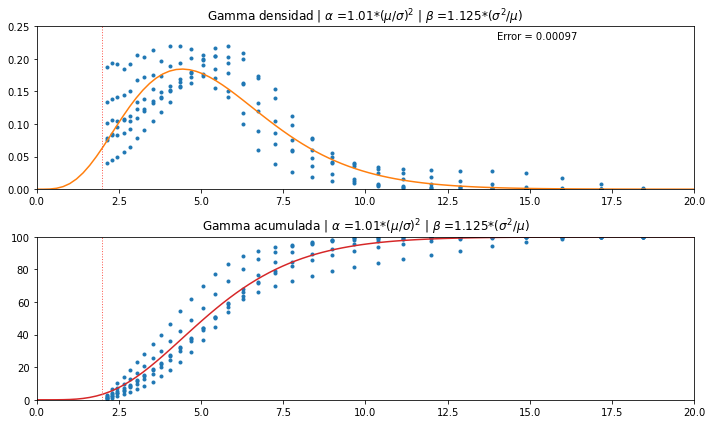

In [5]:
x = np.linspace (0, 20, 100)

# Distribución Gamma:

aopt = mu*(130)/100      # sustituir fila del array de optimización dentro del paréntesis  111
scaleopt = sigma*((61)/200)   # sustituir columna del array de optimización dentro del paréntesis  99

coef = round(aopt/mu,2)
coef2 = round(scaleopt/sigma,3)


aopt_2 = ((mu/sigma)**2)*(81/80)     # 81
scaleopt_2 = ((sigma**2)/mu)*(90/80) # 90

c3 = round((81)/80,2)
c4 = round((90)/80,3)

# densidad:
y1d = stats.gamma.pdf(x, a=aopt, loc=0, scale=scaleopt) #pdf -> probability density function
# acumulada:
y1a = 100*stats.gamma.cdf(x, a=aopt, loc=0, scale=scaleopt) #cdf -> cumulative density function

# densidad_2:
y2d = stats.gamma.pdf(x, a=aopt_2, loc=0, scale=scaleopt_2) #pdf -> probability density function
# acumulada_2:
y2a = 100*stats.gamma.cdf(x, a=aopt_2, loc=0, scale=scaleopt_2) #cdf -> cumulative density function

yerror = stats.gamma.pdf(datos['X'], a=aopt_2, loc=0, scale=scaleopt_2)
error = ((yerror - datos['Densidad'])**2).mean()

# Distribución Log Normal (NO USADA):

# densidad:
#y2d = stats.lognorm.pdf(x, s = sopt, scale = scale2opt, loc = 0)
# acumulada:
#y2a = 100*stats.lognorm.cdf(x, s = sopt, scale = scale2opt, loc = 0)

# Distribución sigmoide (NO USADA)

#datos2 = x**1.2
#y3a = 1/((1/110.01)+0.216*0.638**datos2) - 10

# Graficado:
fig, ((ax21, ax22)) = plt.subplots(2,1,figsize=(10,6)) # cambiar a 2-1?
ax21.plot(x, y2d, "y-", color='tab:orange')
ax21.scatter(datos['X'],datos['Densidad'],marker='.')
ax22.plot(x, y2a, "y-", color='tab:red')
ax22.scatter(datos['X'],datos['Acumulado'],marker='.')

ax21.set_ylim([0,0.25])
ax21.set_xlim([0,20])
ax21.set_title('Gamma densidad |' + r' $\alpha$ =' + str(c3) +r'*$(\mu/\sigma)^2$ | ' + r'$\beta$ =' + str(c4)+r'*$(\sigma^2 / \mu)$')
ax21.annotate('Error = '+str(round(error,5)), xy = [14,0.23])
ax21.axvline(x = 2, linewidth = 1, linestyle='dotted', color = "xkcd:coral")
ax22.set_ylim([0,100])
ax22.set_xlim([0,20])
ax22.set_title('Gamma acumulada |' + r' $\alpha$ =' + str(c3) +r'*$(\mu/\sigma)^2$ | ' + r'$\beta$ =' + str(c4)+r'*$(\sigma^2 / \mu)$')
ax22.axvline(x = 2, linewidth = 1, linestyle='dotted', color = "xkcd:coral")

plt.tight_layout()
plt.show()

In [194]:
!jupyter nbconvert --to script ajuste_curva.ipynb

[NbConvertApp] Converting notebook ajuste_curva.ipynb to script
[NbConvertApp] Writing 3850 bytes to ajuste_curva.py
